In [1]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image

## Defining number of points

In [2]:
POSE_PAIRS = [(0, 1), (1, 2), (2, 3), (3, 4), (1, 5), (5, 6), (6, 7), (1, 8), (8, 12), (8, 9), (9, 10), (12, 13), (13, 14), (10, 11)]
nPoints = len(POSE_PAIRS)

## Importing the Open-pose model from the local system

In [3]:
protoFile = r"C:\Users\birud\OneDrive - iitgn.ac.in\github\openpose_clone\models\pose\body_25\pose_deploy.prototxt"
weightsFile = r"C:\Users\birud\OneDrive - iitgn.ac.in\github\openpose_clone\models\pose\body_25\pose_iter_584000.caffemodel"

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

## Read and Display the image

In [4]:
im = cv2.imread(r"C:\Users\birud\OneDrive - iitgn.ac.in\github\Pose-estimation\files\test images\virat.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
inWidth = im.shape[1]
inHeight = im.shape[0]

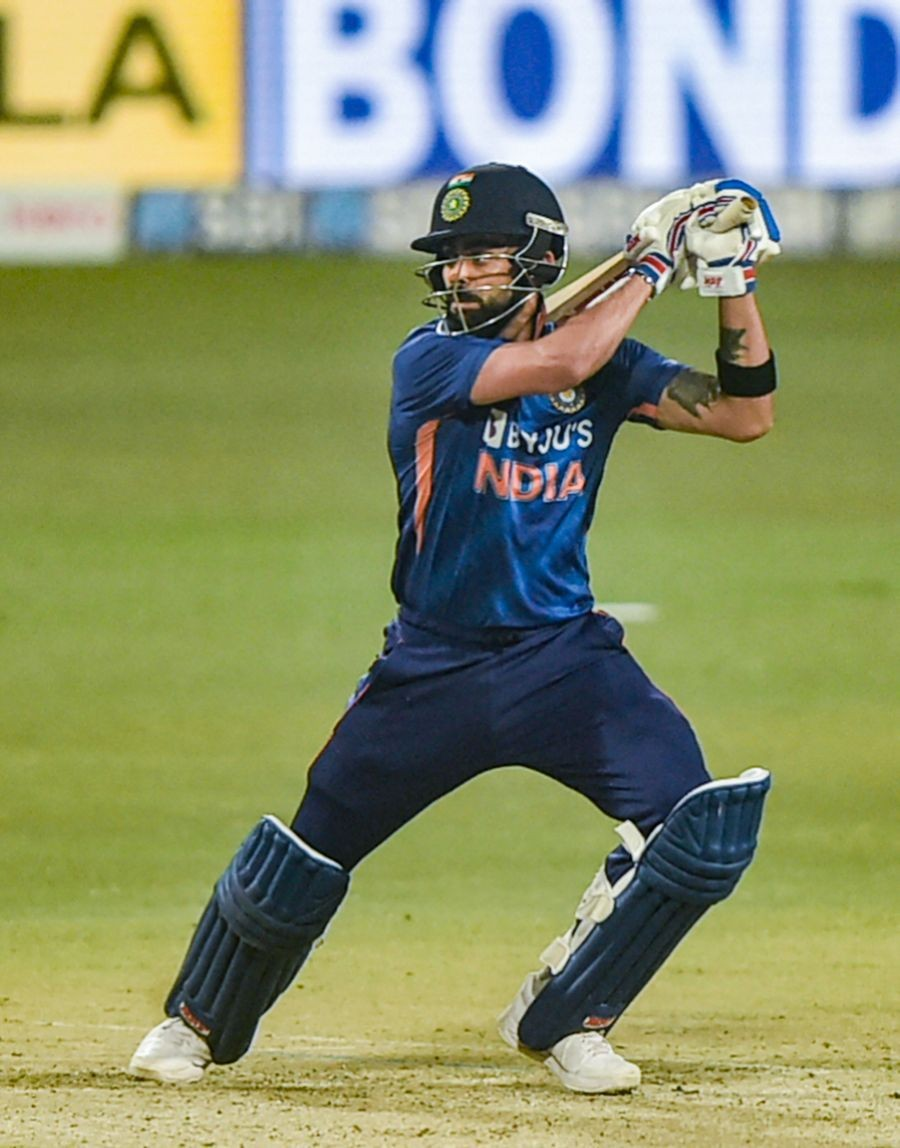

In [5]:
image_path = r'C:\Users\birud\OneDrive - iitgn.ac.in\github\Pose-estimation\files\test images\virat.jpg'
display(Image(filename=image_path, width=500, height=500))

## Convert Image to Blob

In [6]:
netInputSize = (368, 368)
inpBlob = cv2.dnn.blobFromImage(im, 1.0 / 255, netInputSize, (0, 0, 0), swapRB = True, crop = False)
net.setInput(inpBlob)

## Run Inference (Forward Pass)

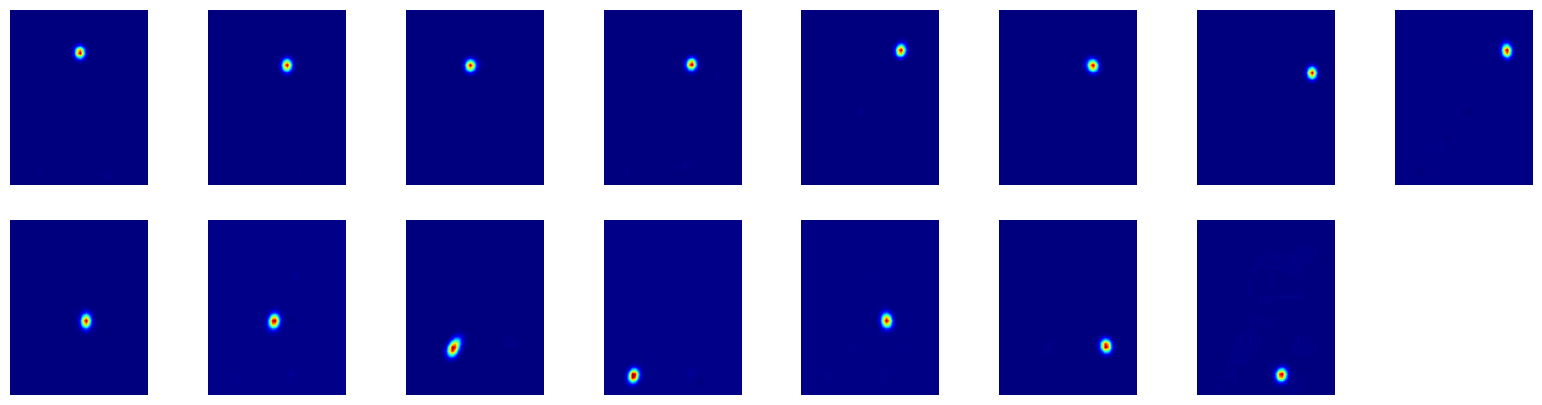

In [7]:
# Forward Pass
output = net.forward()

# Display Probability maps
plt.figure(figsize=(20,5))
for i in range(15):
    probMap = output[0, i, :, :]
    displayMap = cv2.resize(probMap, (inWidth, inHeight), cv2.INTER_LINEAR)
    plt.subplot(2, 8, i + 1); plt.axis('off'); plt.imshow(displayMap, cmap = 'jet')

## Extract Points

In [8]:
# X and Y Scale
scaleX = inWidth / output.shape[3]
scaleY = inHeight / output.shape[2]

# Empty list to store the detected keypoints
points = []

# Threshold
threshold = 0.1

for i in range(15):
    # Obtain probability map
    probMap = output[0, i, :, :]
    
    # Find global maxima of the probMap
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = scaleX*point[0]
    y = scaleY*point[1]
    
    if prob > threshold:
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else:
        points.append(None)
        

## Display Points and Skeleton

In [9]:
print(points)

[(450, 274), (508, 349), (410, 349), (567, 349), (645, 249), (606, 349), (743, 399), (723, 249), (489, 648), (430, 648), (293, 823), (176, 998), (547, 648), (684, 823), (547, 998)]


In [10]:
imPoints = im.copy()
imSkeleton = im.copy()

# Draw points
for i, p in enumerate(points):
    cv2.circle(imPoints, p, 8, (255, 255, 0), thickness = -1, lineType = cv2.FILLED)
    cv2.circle(imSkeleton, p, 8, (255, 0, 0), thickness = -1, lineType = cv2.FILLED)
    cv2.putText(imPoints, "{}".format(i), p, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, lineType = cv2.LINE_AA)
    
# Draw skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]
    
    if points[partA] and points[partB]:
        cv2.line(imSkeleton, points[partA], points[partB], (255, 255, 0), 2)

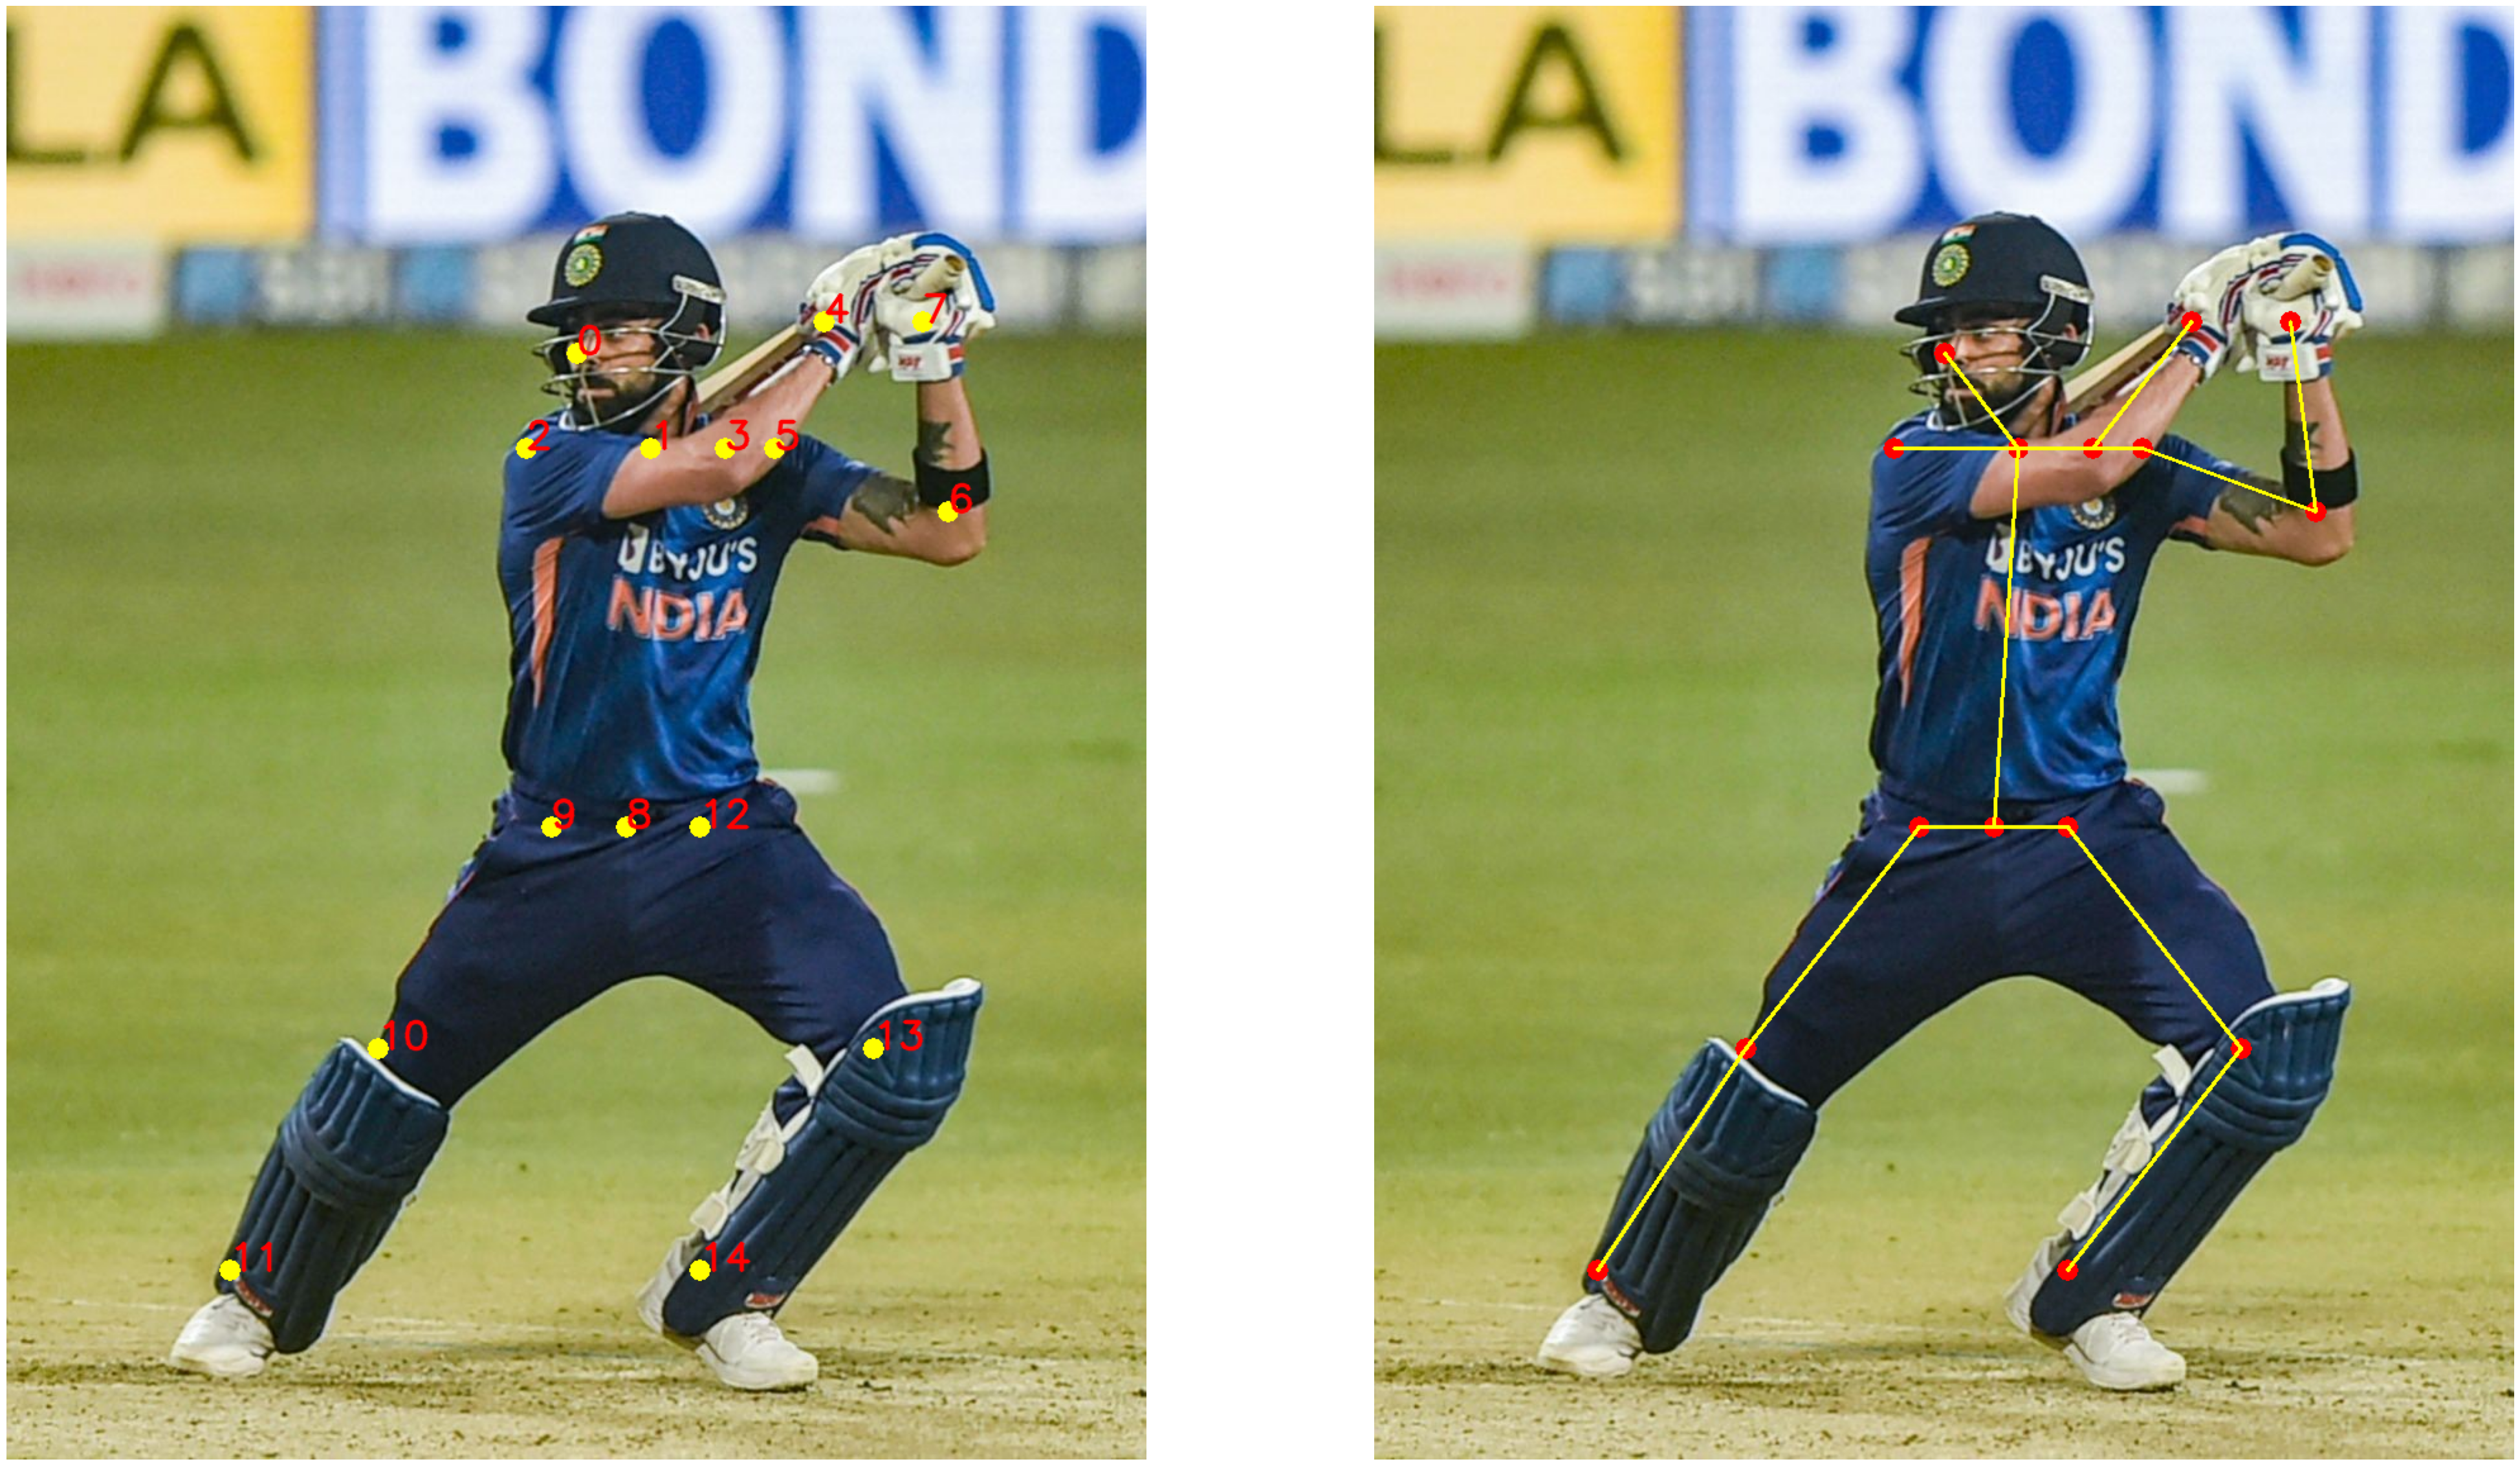

In [11]:
plt.figure(figsize=(50, 50))
plt.subplot(121)
plt.axis('off')
plt.imshow(imPoints)

plt.subplot(122)
plt.axis('off')
plt.imshow(imSkeleton)